In [51]:
#import libraries
import math
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report

In [52]:
#load dataframes
x_train = pd.read_pickle('x_Train')
x_test = pd.read_pickle('x_test')
y_test = pd.read_pickle('y_test')
y_train = pd.read_pickle('y_train')
test_data = pd.read_pickle('test_data')

labels = np.array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 
                   'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
                   'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
                   'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
                   'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
                   'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
                   'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
                   'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
                   'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
                   'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
                   'WARRANTS', 'WEAPON LAWS'])

In [53]:
#Classifier Functions
def naiveBayes(x_train, y_train):
    naive = BernoulliNB()
    naive.fit(x_train, y_train)
    pred_Test = naive.predict(x_test)
    pred_Train = naive.predict(x_train)
    return pred_Test, pred_Train, naive

def dTree(x_train, y_train):
    dTree = DecisionTreeClassifier()
    dTree = dTree.fit(x_train, y_train)
    pred_Test = dTree.predict(x_test)
    pred_Train = dTree.predict(x_train)
    return pred_Test, pred_Train, dTree

def forest(x_train, y_train):
    forest = RandomForestClassifier(n_estimators = 50, max_features = 6, max_depth = 14)
    forest = forest.fit(x_train, y_train)
    pred_Test = forest.predict(x_test)
    pred_Train = forest.predict(x_train)
    return pred_Test, pred_Train, forest

def LogReg(x_train, y_train):
    LogReg = LogisticRegression()
    LogReg = LogReg.fit(x_train, y_train)
    pred_Test = LogReg.predict(x_test)
    pred_Train = LogReg.predict(x_train)
    return pred_Test, pred_Train, LogReg

def neighbors(x_train, y_train):
    neighbors = KNeighborsClassifier().fit(x_train, y_train)
    pred_Test = neighbors.predict(x_test)
    pred_Train = neighbors.predict(x_train)
    return pred_Test, pred_Train, neighbors

In [54]:
#Choose the Classifier
def chooseClassifier(name):
    if(name=='naiveBayes'):
        pred_Test, pred_Train, model = naiveBayes(x_train, y_train)
        return pred_Test, pred_Train, model

    if(name=='DecisionTree'):
        pred_Test, pred_Train, model = dTree(x_train, y_train)
        return pred_Test, pred_Train, model

    if(name=='RandomForest'):
        pred_Test, pred_Train, model = forest(x_train, y_train)
        return pred_Test, pred_Train, model

    if(name=='LogisticRegression'):
        pred_Test, pred_Train, model = LogReg(x_train, y_train)
        return pred_Test, pred_Train, model
    
    if(name=='neighbors'):
        pred_Test, pred_Train, model = neighbors(x_train, y_train)
        return pred_Test, pred_Train, model

In [55]:
def modelToCsv(model):
    """Die Methode schreibt predictions des übergebenen Modells in eine CSV Datei Namens 'submit.csv'.
    Die CSV Datei hat das von Kaggle gewünschte Format."""
    #Droppe Column Id, um die gleichen Features auf den Testdaten wie auf den Trainingsdaten zu haben
    test_daten = test_data.drop(['Id'], axis = 1)
    #Predicte das Ergebnis
    predicted = model.predict_proba(test_daten)

    
    result = pd.DataFrame(predicted, columns = labels)
    result.to_csv('submit_forest.csv',index=True, index_label='Id')

In [56]:
#Übergebe den Namen eines Classifiers mit der Funktione um das Training zu beginnen

pred_Test, pred_Train, model = chooseClassifier("RandomForest")

print('Accuracy auf den Testdaten: '  + "%.2f" % (accuracy_score(y_test, pred_Test)*100))
print('Accuracy auf den Trainingsdaten: '  + "%.2f" % (accuracy_score(y_train, pred_Train)*100))

Accuracy auf den Testdaten: 27.84
Accuracy auf den Trainingsdaten: 31.82


In [57]:
# Ausführen, um die Prediciton als CSV (submit.csv) zu speichern
modelToCsv(model)

In [58]:
cm = multilabel_confusion_matrix(y_test, pred_Test)

In [59]:
class_names = np.arange(1, 40)

Confusion matrix, without normalization
[[   0   21    0 ...   19    0    0]
 [   0  840    0 ...  610    5    0]
 [   0    1    0 ...    5    0    0]
 ...
 [   0  146    0 ... 2288    0    0]
 [   0  171    0 ...  191   24    0]
 [   0   89    0 ...   62    0    0]]


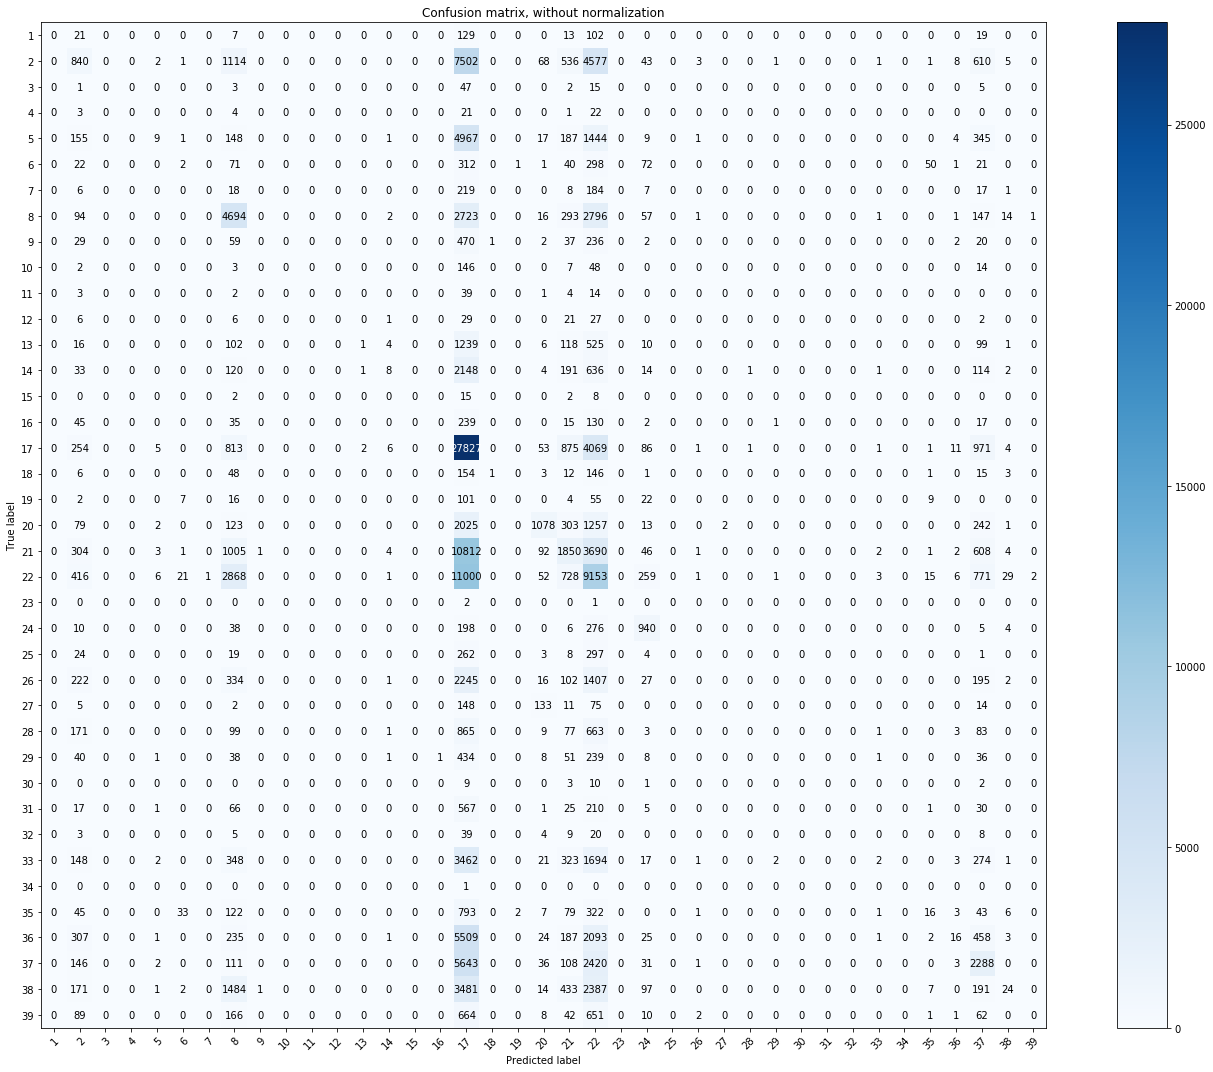

Normalized confusion matrix
[[0.   0.07 0.   ... 0.07 0.   0.  ]
 [0.   0.05 0.   ... 0.04 0.   0.  ]
 [0.   0.01 0.   ... 0.07 0.   0.  ]
 ...
 [0.   0.01 0.   ... 0.21 0.   0.  ]
 [0.   0.02 0.   ... 0.02 0.   0.  ]
 [0.   0.05 0.   ... 0.04 0.   0.  ]]


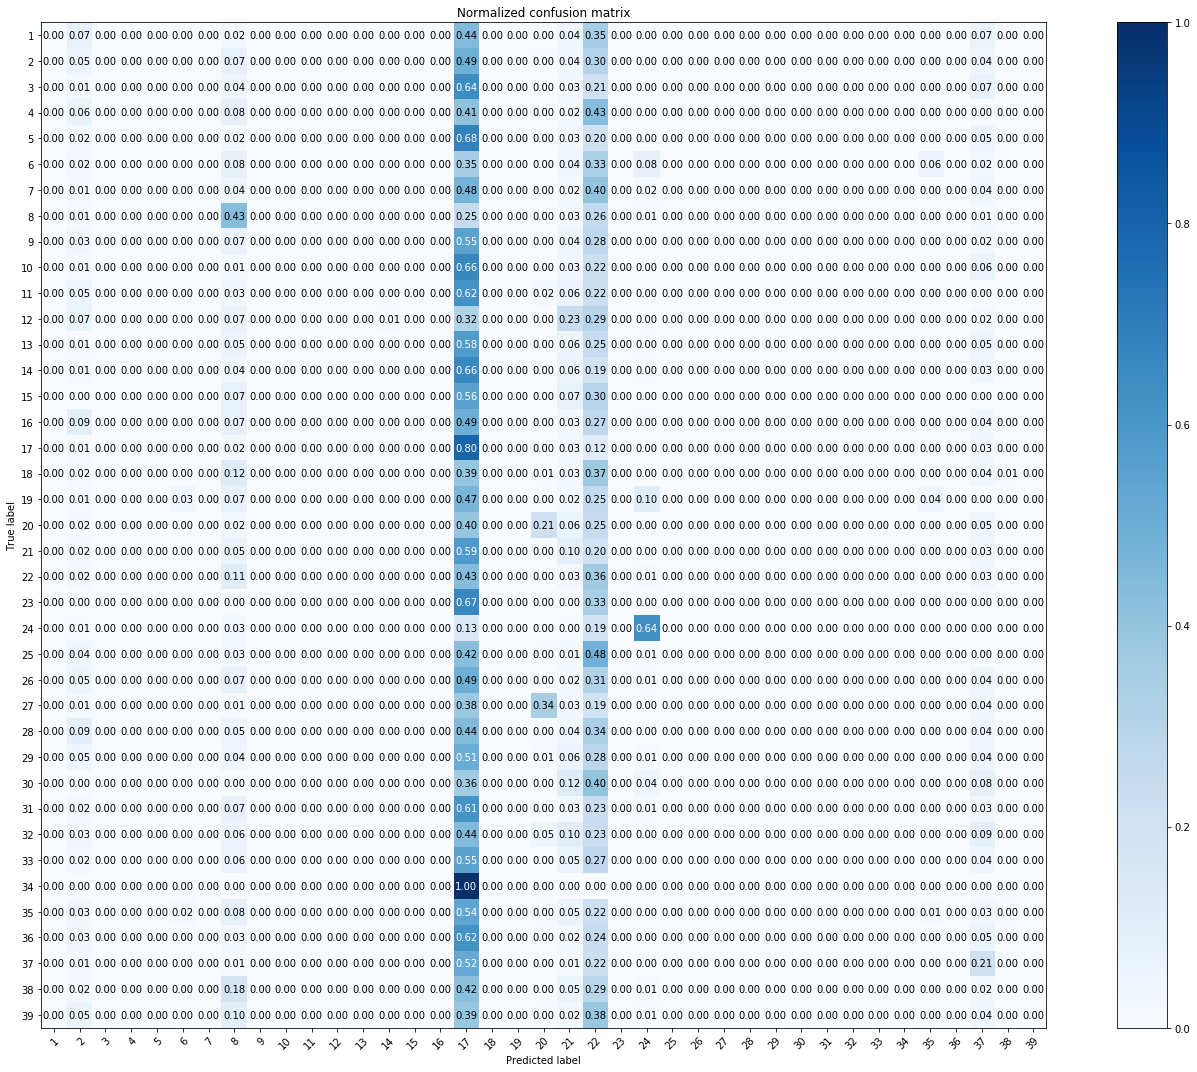

In [60]:
def plot_confusion_matrix(y_test, pred_Test, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, pred_Test)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_test, pred_Test)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig,ax = plt.subplots(figsize=(20,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, pred_Test, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig('forrest_cm.png')
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, pred_Test, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.savefig('forrest_cm_nom.png')
plt.show()